# Circular velocity curves and density profiles of NFW models

Figure 6.4 from Chapter 6 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots the circular velocity curves and density profiles of NFW models with concentration parameters $C$={3,10,30}.

In [6]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [7]:
plotFile = 'Fig6_4.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Circular velocity curves and density profiles

An NFW model potential with concentration parameter $C$ has a circular velocity curve
\begin{equation}
  \frac{v_c(w)}{v_c(r_{200})} = \left[\frac{A(Cw)}{wA(C)}\right]^{1/2}
\end{equation}
and a density profile
\begin{equation}
  \frac{\rho(w)}{200\rho_{c,0}} = \frac{C^2}{3A(C)}\left[\frac{1}{w(1+Cw)^2}\right]
\end{equation}
where $w$ is the dimensionless radius $r/r_{200}$, and $A(C)$ is the dimensionless mass function
\begin{equation}
  A(C) = \ln(1+C) - \frac{C}{1+C}
\end{equation}

We compute $v_c$ and $\rho$ profiles for $w$=[0..1] for concentration parameters $C$={3,10,30}.

In [8]:
# dimensionless mass function (Eqn 6.118)

def A(C):
    return np.log(1+C) - C/(1+C)

# circular velocity curve

def vCirc(w,C):
    return np.sqrt(A(C*w)/(w*A(C)))

# density profile

def rho(w,C):
    return (C**2/(3*A(C)))*(1/(w*(1+C*w)**2))

# Range of C and line types

modelC = [3,10,30]
modelLS = {3:':',10:'-',30:'--'}

## Figure 6.4: side by side format

Left Panel: density profile in log-log format

Right Panel: circular velocity curves in linear-linear format

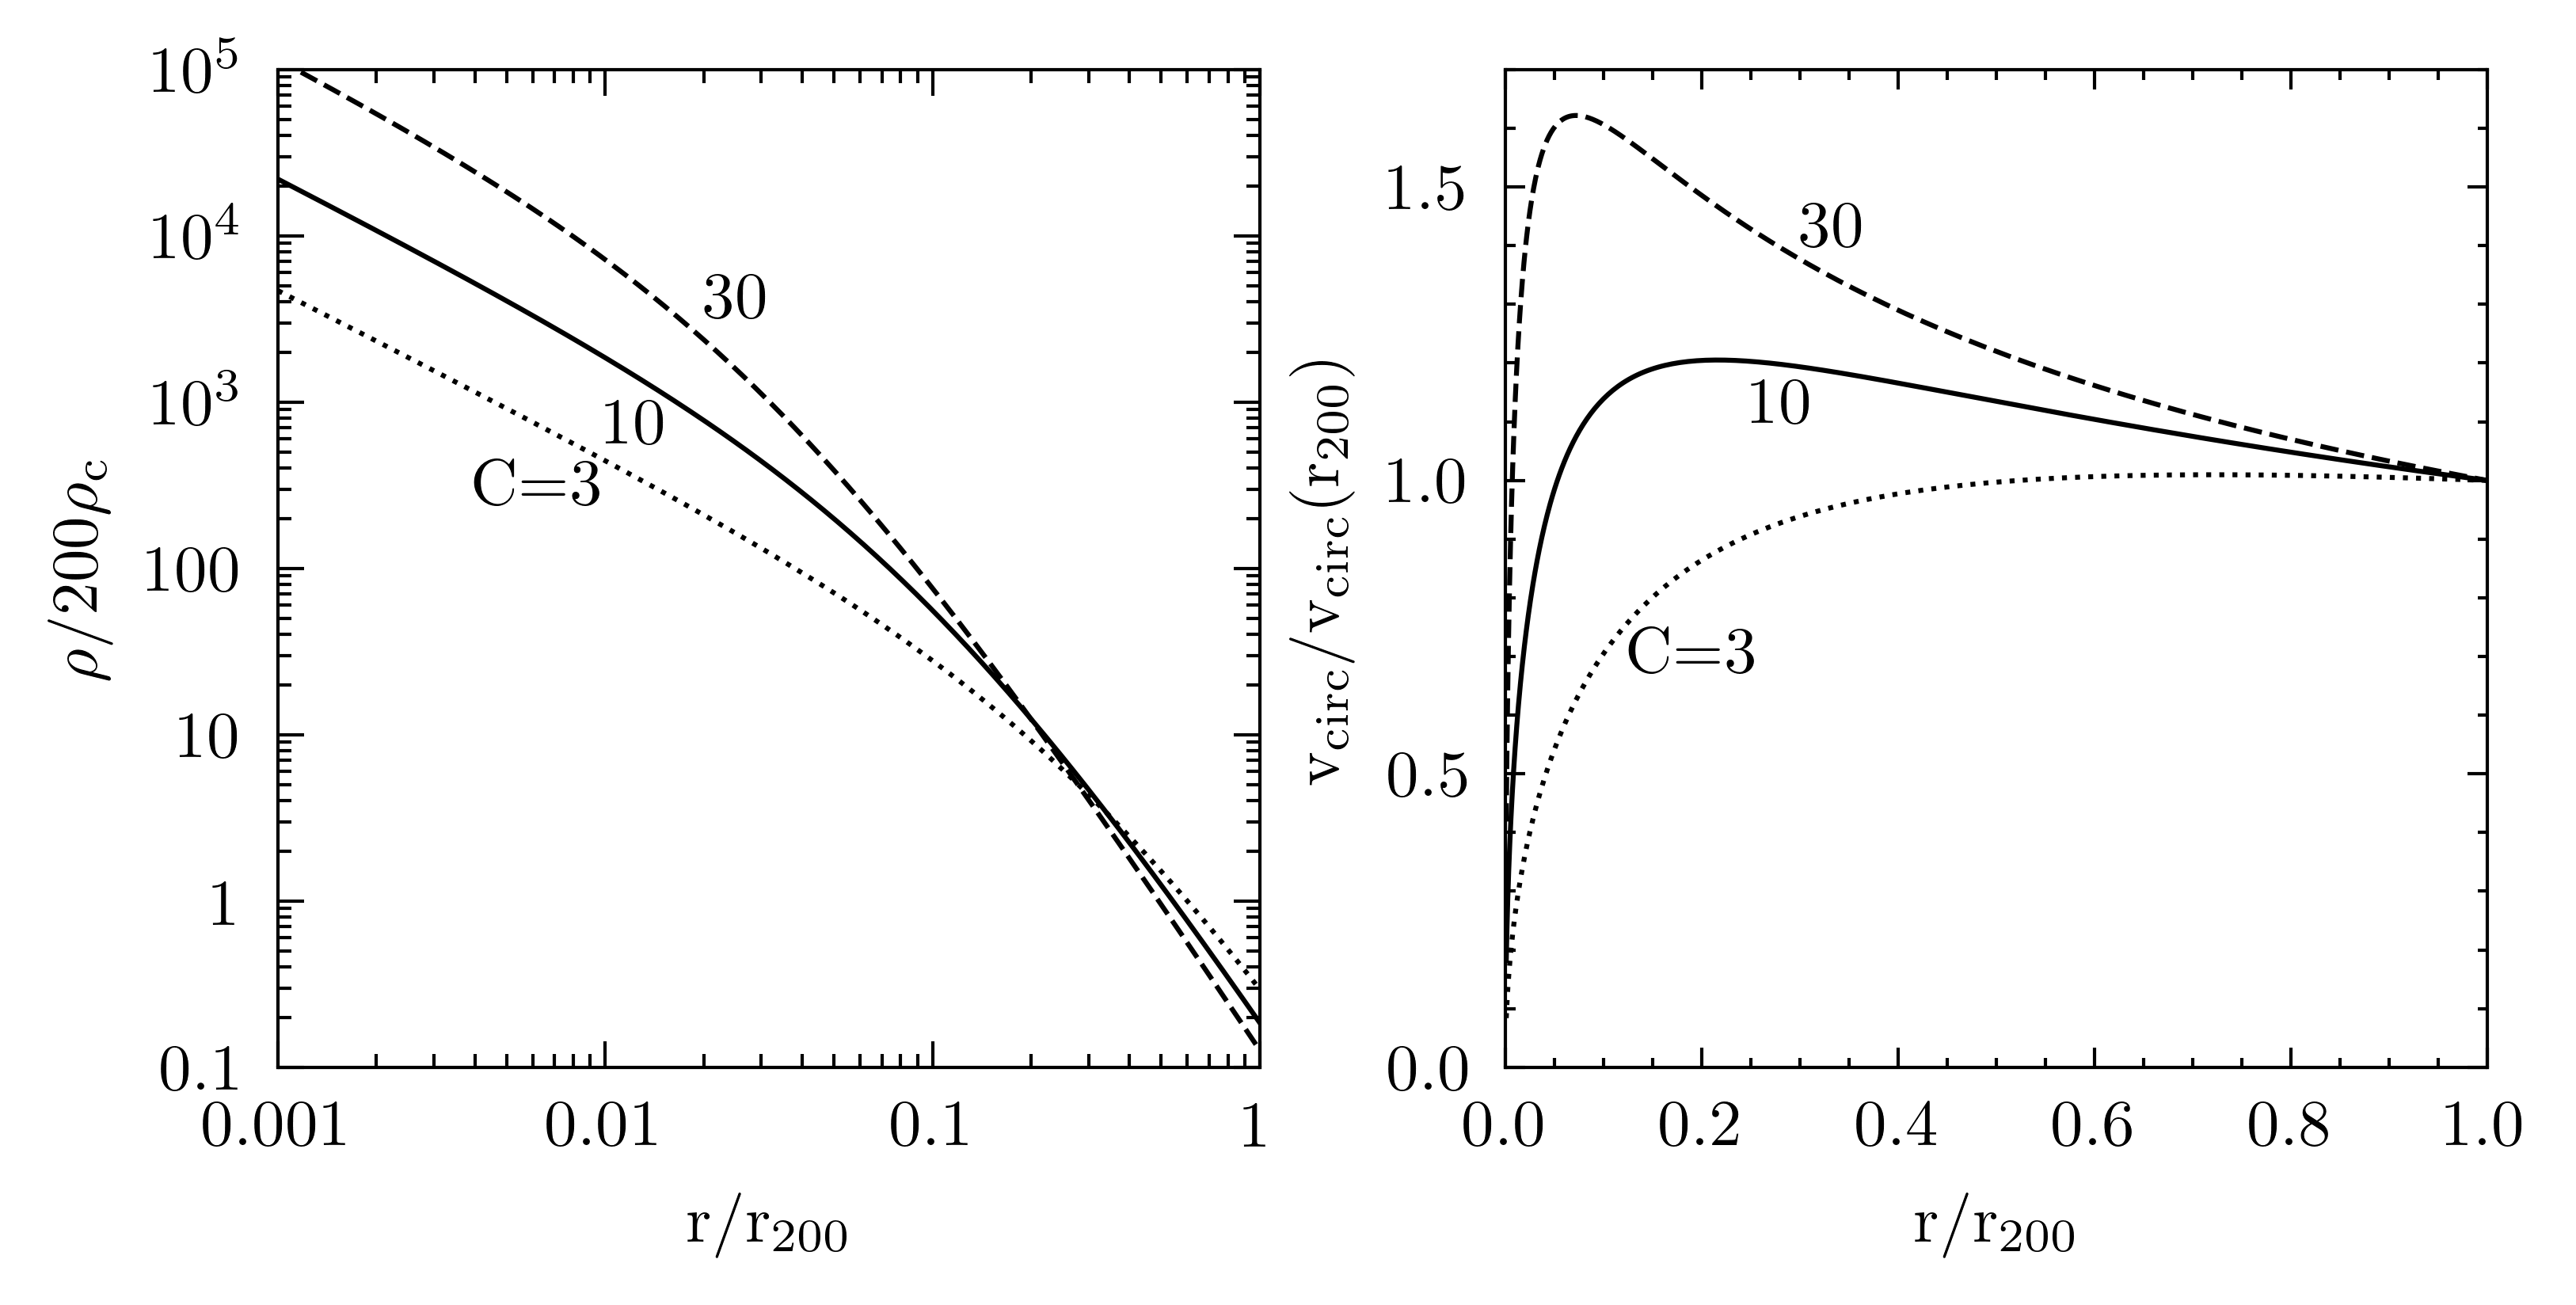

In [9]:
# plotting limits and range of w

rMin = 0.001 # radii for compute
rMax = 1.0

wMin = 0 # for linear plotting axes
wMax = 1

w = 10.0**np.linspace(np.log10(rMin),np.log10(rMax),301)

rhoMin = 0.1   # rho/200rho_c
rhoMax = 1.0e5

vMin = 0.0 # v/v(r_200)
vMax = 1.7


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: density profiles

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(rMin,rMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.001,0.01,0.1,1,])
ax1.set_xticklabels(['0.001','0.01','0.1','1'])
ax1.set_xlabel(r'r/r$_{\rm 200}$',fontsize=axisFontSize)

ax1.set_ylim(rhoMin,rhoMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([0.1,1,10,100,1e3,1e4,1e5])
ax1.set_yticklabels(['0.1','1','10','100','$10^3$','10$^4$','10$^5$'])
ax1.set_ylabel(r'$\rho/200\rho_{\rm c}$',fontsize=axisFontSize)

for C in modelC:
    ax1.plot(w,rho(w,C),ls=modelLS[C],lw=0.75,color='black',zorder=10)

ax1.text(0.01,300,'C=3',ha='right',va='center',fontsize=axisFontSize)
ax1.text(0.01,700,'10',ha='left',va='center',fontsize=axisFontSize)
ax1.text(0.02,4000,'30',ha='left',va='center',fontsize=axisFontSize)

# right panel: circular speed profiles

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(wMin,wMax)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_xlabel(r'r/r$_{\rm 200}$',fontsize=axisFontSize)

ax2.set_ylim(vMin,vMax)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.set_ylabel(r'v$_{\rm circ}$/v$_{\rm circ}$(r$_{\rm 200}$)',fontsize=axisFontSize)

for C in modelC:
    ax2.plot(w,vCirc(w,C),ls=modelLS[C],lw=0.75,color='black',zorder=10)

ax2.text(0.125,0.7,'C=3',ha='left',va='center',fontsize=axisFontSize)
ax2.text(0.25,1.125,'10',ha='left',va='center',fontsize=axisFontSize)
ax2.text(0.3,1.425,'30',ha='left',va='center',fontsize=axisFontSize)

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')